In [2]:
import nbsetup
import pickle
from models.load import load_sparc
from models.sparc.result import Result
from models.sparc.tune import Tune
from models.sparc.mcmc import mcmc
import matplotlib.pyplot as plt

In [3]:
SAVE_FIGURES = True
xlabel = 'Uncorrected Log($g_A$) [$ms^{-2}$]'
xlabel_tuned = 'Mass-to-light ratio (Y) adjusted Log(Y $g_A$) [$ms^{-2}$]'
FILTER = 'Quality simulation'

In [4]:
raw = Result(load_sparc(namespace='ratio/201_21'))

In [5]:
raw.residual_stats()

,filter,mean,std,count,mse,rmse
0,Everything,-0.036549,0.357978,3327,0.129446,0.359786
1,Quality data,-0.029690,0.362464,2096,0.132199,0.363592
2,Quality simulation,-0.015684,0.365802,1482,0.133967,0.366015


In [6]:
analysis = Tune(mcmc(raw.datasets()[FILTER], train_d=False, y_uni=True, train_inc=False, tight={'Inc': 0.01, 'Ymass': 0.01}))

In [7]:
tuned = analysis.Result(fast=True, simulations=raw.simulations)

In [8]:
tuned.residual_stats()

,filter,mean,std,count,mse,rmse
0,Everything,-0.002227,0.136179,2096,0.018541,0.136164
1,Quality data,-0.002227,0.136179,2096,0.018541,0.136164
2,Quality simulation,0.001250,0.067092,1482,0.004500,0.067081


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


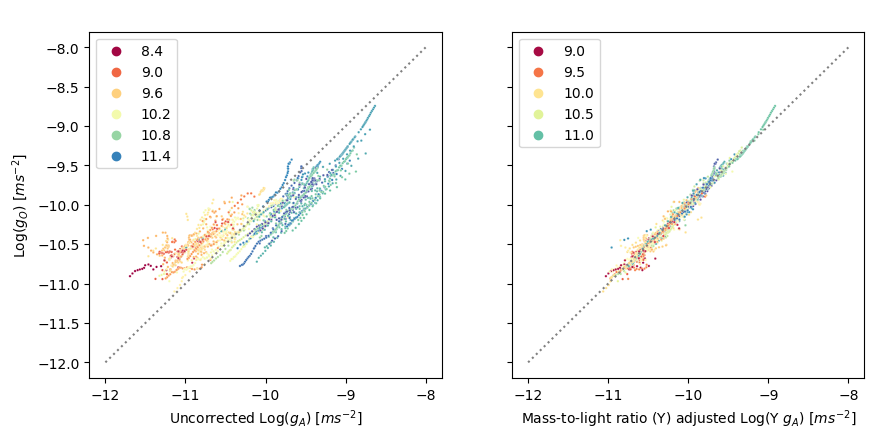

In [9]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,4.5))
raw.plot_rar(kind=0, title=' ', query_key=FILTER, label=xlabel, axis=axes[0])
tuned.plot_rar(kind=0, title=' ', query_key=FILTER, label=xlabel_tuned, axis=axes[1])
if SAVE_FIGURES: fig.savefig('../figures/ratio_both_rar_quality.eps')

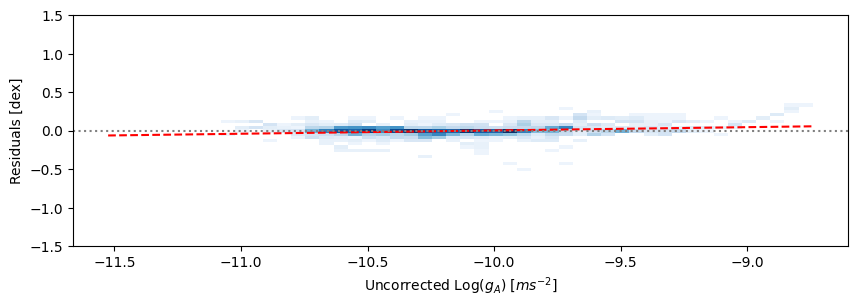

In [10]:
g = tuned.residual(xlabel=xlabel, ylim=(-1.5, 1.5))

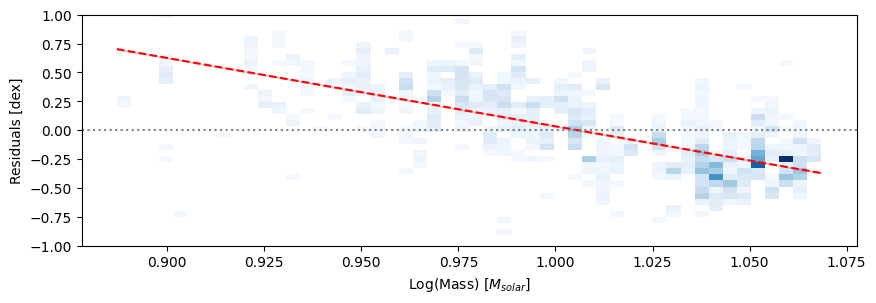

In [11]:
g = raw.residual(resid='log_M', xlabel='Log(Mass) [$M_{solar}$]', ylim=(-1,1))

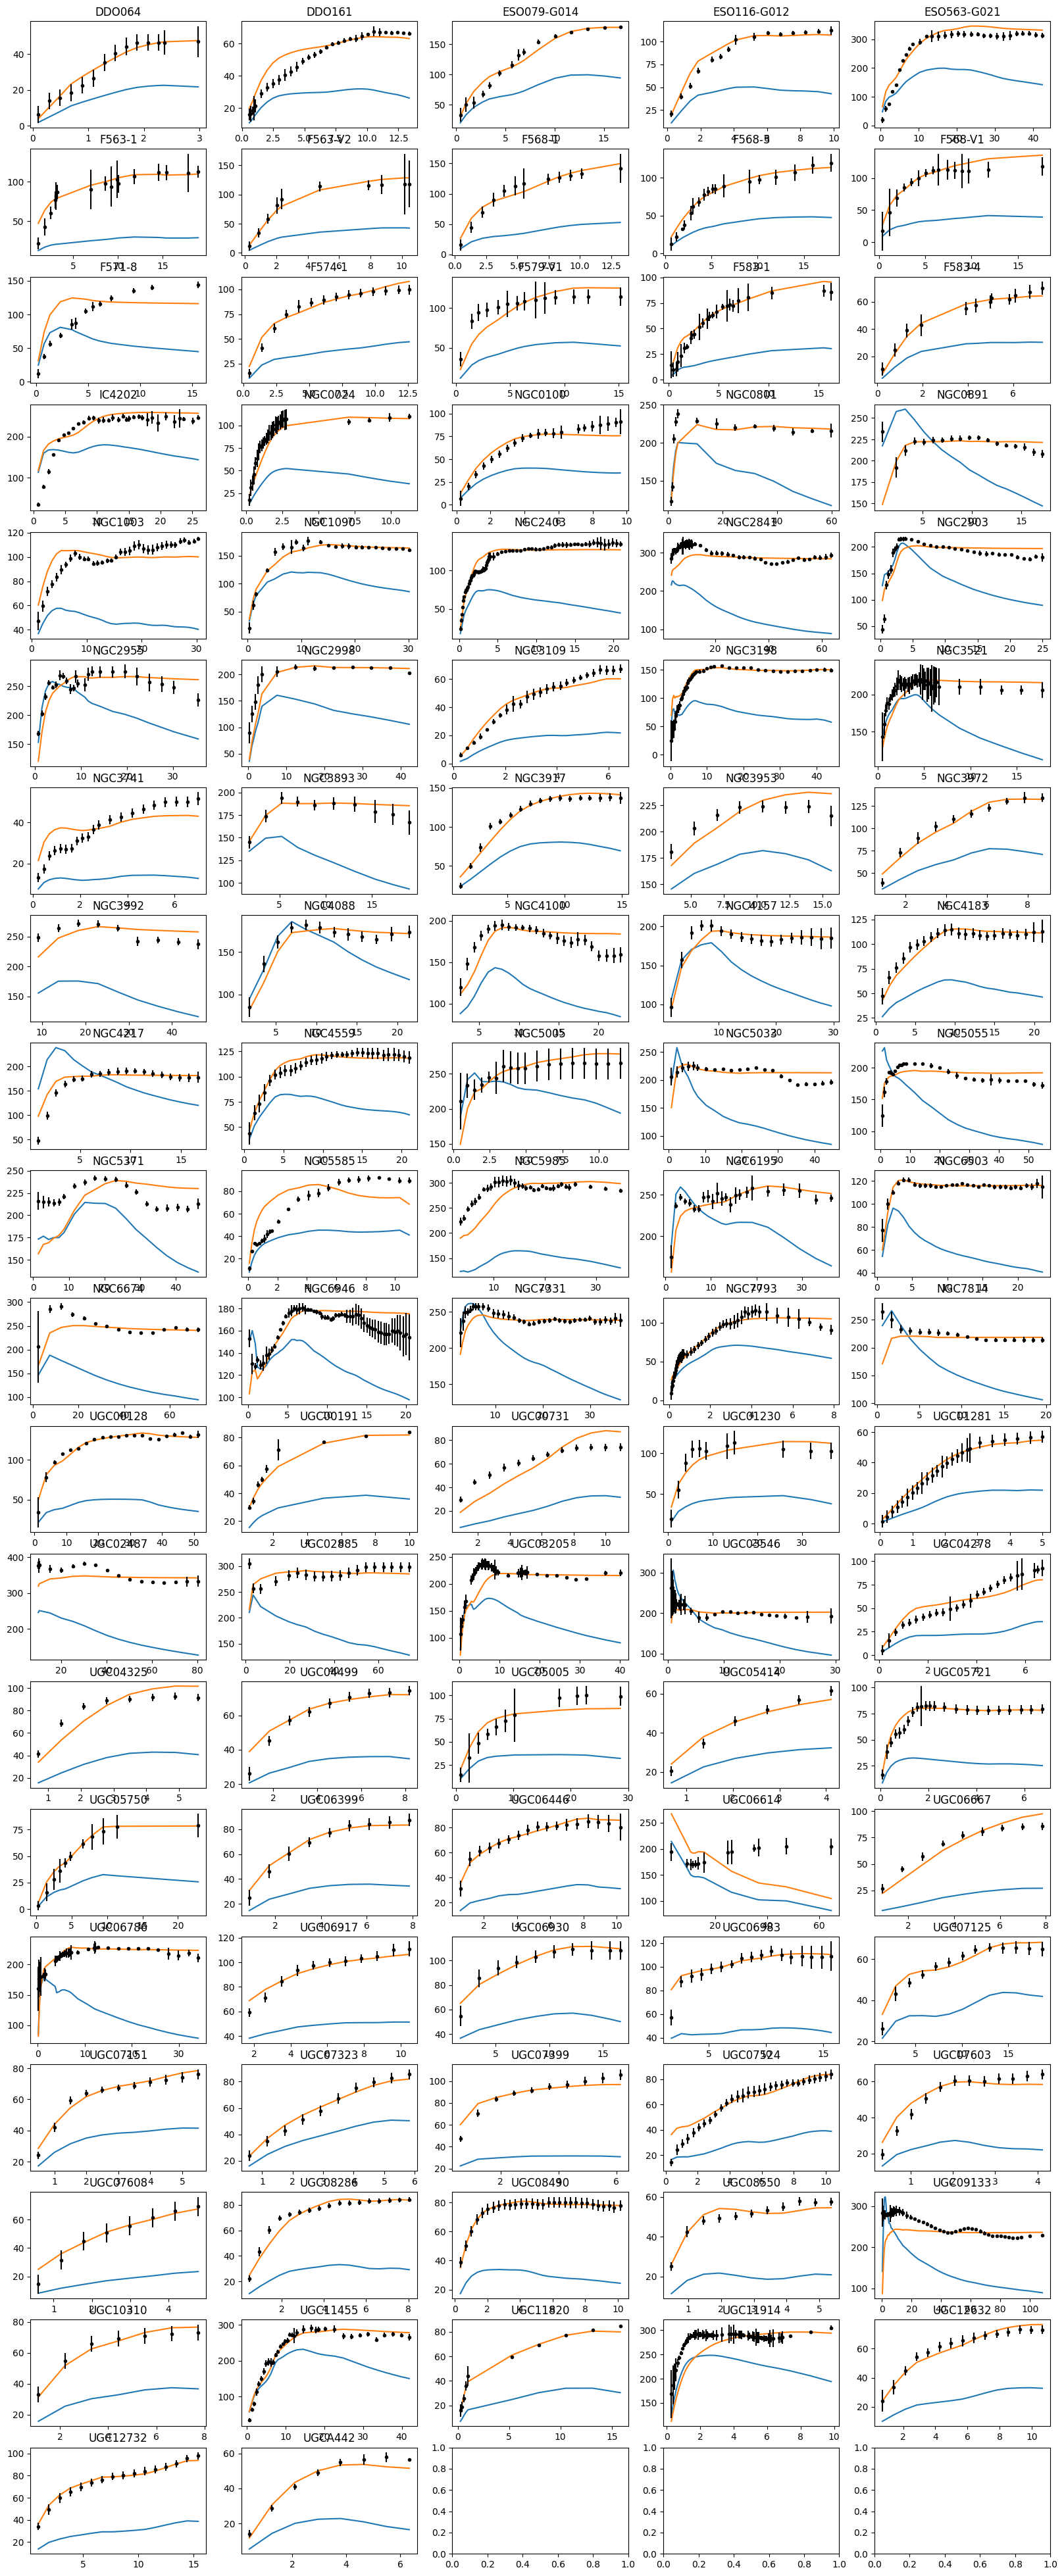

In [14]:
baseline = Result(load_sparc(namespace='baseline/201_21'))
g = tuned.plot_curves(baseline)